<a href="https://colab.research.google.com/github/diablaxus/Red-Neuronal-Multicapa/blob/main/MulticapaPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4857 - accuracy: 0.4584 - val_loss: 1.2300 - val_accuracy: 0.5569
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1211 - accuracy: 0.6037 - val_loss: 1.0559 - val_accuracy: 0.6191
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9776 - accuracy: 0.6576 - val_loss: 1.0085 - val_accuracy: 0.6437
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8940 - accuracy: 0.6872 - val_loss: 0.9407 - val_accuracy: 0.6667
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8238 - accuracy: 0.7128 - val_loss: 0.9026 - val_accuracy: 0.6846
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7672 - accuracy: 0.7314 - val_loss: 0.8689 - val_accuracy: 0.6981
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7179 - accuracy: 0.7507 - val_loss: 0.8707 - val_ac

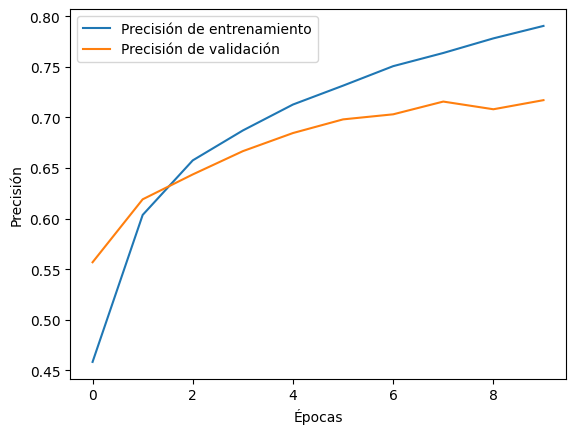

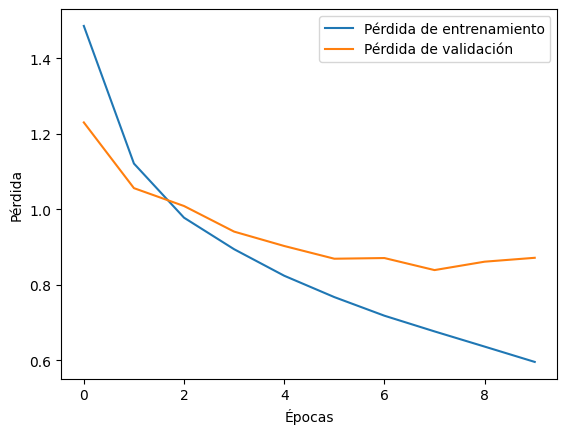

In [2]:
# Ejercicio 1: Red Neuronal Multicapa en PyTorch para un problema de clasificación
# Paso 1: Importar las bibliotecas necesarias

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Paso 2: Cargar y preprocesar el dataset CIFAR-10
# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalizar los valores de los píxeles de las imágenes a un rango entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Paso 3: Definir la arquitectura de la red neuronal convolucional (CNN)
model = models.Sequential()

# Añade una capa convolucional con 32 filtros, tamaño de kernel (3,3), activación ReLU y tamaño de imagen de entrada
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))  # Capa de MaxPooling

# Añade otra capa convolucional con 64 filtros
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))  # Capa de MaxPooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Aplana la salida de las capas convolucionales en un vector unidimensional
model.add(layers.Flatten())

# Añade una capa densa con 64 unidades y activación ReLU
model.add(layers.Dense(64, activation='relu'))

# Añade la capa de salida con 10 neuronas (una por clase) y activación softmax
model.add(layers.Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Paso 6: Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')

# Paso 7: Graficar el historial de precisión y pérdida

# Graficar precisión del entrenamiento y la validación
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar pérdida del entrenamiento y la validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()
